## 电影评论分类： 二分类问题

In [34]:
from keras.datasets import imdb
# load的文件默认放在~/.keras/datasets下
# 此处加载时报错，修改了miniconda2/envs/keras2.0.8/lib/python3.6/site-packages/keras/datasets/imdb.py 52行
#
# 原: with np.load(path) as f:
#        x_train, labels_train = f['x_train'], f['y_train']
#        x_test, labels_test = f['x_test'], f['y_test']
#
# 改: with np.load(path, allow_picle=True) as f:
#        x_train, labels_train = f['x_train'], f['y_train']
#        x_test, labels_test = f['x_test'], f['y_test']

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


#### 解码数据

In [14]:
word_index = imdb.get_word_index()  # 获取字符索引文件

1646592/1641221 [==============================] - 2s     


In [15]:
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)

In [22]:
# 索引-3，因为0、1、2是为了填充（padding）
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [23]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

#### 对数据进行矩阵转换，将数据转为10000维向量

In [25]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [36]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [39]:
# 对标签也进行向量化
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### 构建网络

In [43]:
from keras import models
from keras import layers

In [55]:
model = models.Sequential()

In [56]:
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

### 编译模型

In [59]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [60]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [61]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s - loss: 0.5299 - acc: 0.7711 - val_loss: 0.4351 - val_acc: 0.8282
Epoch 2/20
15000/15000 [==============================] - 3s - loss: 0.3149 - acc: 0.9005 - val_loss: 0.3117 - val_acc: 0.8846
Epoch 3/20
15000/15000 [==============================] - 2s - loss: 0.2303 - acc: 0.9252 - val_loss: 0.3138 - val_acc: 0.8725
Epoch 4/20
15000/15000 [==============================] - 1s - loss: 0.1818 - acc: 0.9415 - val_loss: 0.2735 - val_acc: 0.8905
Epoch 5/20
15000/15000 [==============================] - 1s - loss: 0.1503 - acc: 0.9525 - val_loss: 0.2860 - val_acc: 0.8868
Epoch 6/20
15000/15000 [==============================] - 2s - loss: 0.1220 - acc: 0.9616 - val_loss: 0.3253 - val_acc: 0.8723
Epoch 7/20
15000/15000 [==============================] - 2s - loss: 0.1032 - acc: 0.9691 - val_loss: 0.3069 - val_acc: 0.88500.9
Epoch 8/20
15000/15000 [==============================] - 

In [62]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

### 绘制训练损失和验证损失

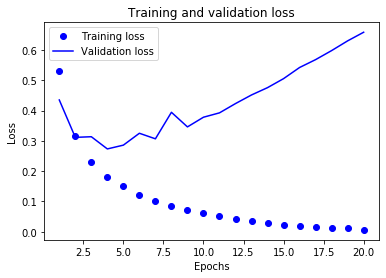

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### 绘制训练精度和验证精度

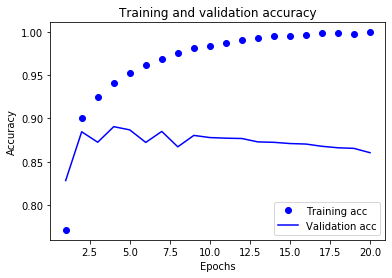

In [66]:
plt.clf()  # 清空图像
%matplotlib inline

acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 代码

In [72]:
import numpy as np
from keras.datasets import imdb
from keras import models
from keras import layers
import matplotlib.pyplot as plt
%matplotlib inline


# 字符转换向量函数
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# 加载数据
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# 对数据和标签进行向量化
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# 构建网络
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# 编译模型
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# 留出验证数据
x_val = x_train[:10000]  # 验证用
partial_x_train = x_train[10000:]  # 训练用

y_val = y_train[:10000]  # 验证用
partial_y_train = y_train[10000:]  # 训练用

# 训练
history = model.fit(partial_x_train, partial_y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))

# 评估
results = model.evaluate(x_test, y_test)
print('评估：', results)

# 预测
model.predict(x_test)

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 3s - loss: 0.5157 - acc: 0.7895 - val_loss: 0.4009 - val_acc: 0.8653
Epoch 2/4
15000/15000 [==============================] - 2s - loss: 0.3146 - acc: 0.9029 - val_loss: 0.3247 - val_acc: 0.8787
Epoch 3/4
15000/15000 [==============================] - 1s - loss: 0.2319 - acc: 0.9246 - val_loss: 0.2808 - val_acc: 0.8923
Epoch 4/4
24832/25000 [============================>.] - ETA: 0s评估： [0.2911555328845978, 0.88292]


array([[0.92948604],
       [0.82596517],
       [0.99709994],
       ...,
       [0.77651155],
       [0.02592379],
       [0.8645573 ]], dtype=float32)

## 总结

**常见的网络拓扑结构**
* 线性堆叠(Sequential)的网络
* 双分支(two-brach)网络
* 多头(multihead)网络
* Inception模块

**选择损失函数的一些简单的原则**
* 二分类问题，可以使用二元交叉墒(binary crossentropy)
* 多元分类问题，可以使用分类交叉墒(categorical crossentropy)
* 回归问题，可以使用均方误差(mean-squared error)
* 序列学习问题，可以使用联结主义时序分类(CTC)

**本例中，单词序列可以编码为二进制向量，但也有其他编码方式**  
**对于二分类问题的sigmoid标量输出，应该使用binary_crossentropy损失函数**